In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Python ile Makine Öğrenmesi/Denemeler/Kalp Hastalığı'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Python ile Makine Öğrenmesi/Denemeler/Kalp Hastalığı
'Heart Attack.csv'  'Kalp Hastalğı.ipynb'


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [92]:
data = pd.read_csv('Heart Attack.csv')
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


<ipython-input-15-5b4bee9730f7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = data.corr()


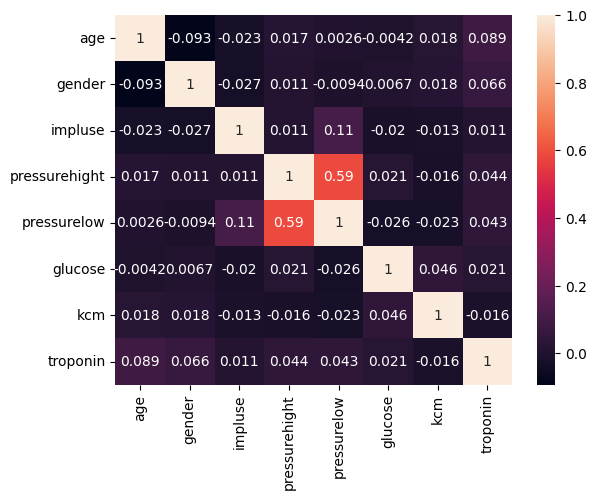

In [15]:
print(data.isnull().sum())
print(data.info())

correlation_mat = data.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Text(0.5, 1.0, 'pressurehight - pressurelow')

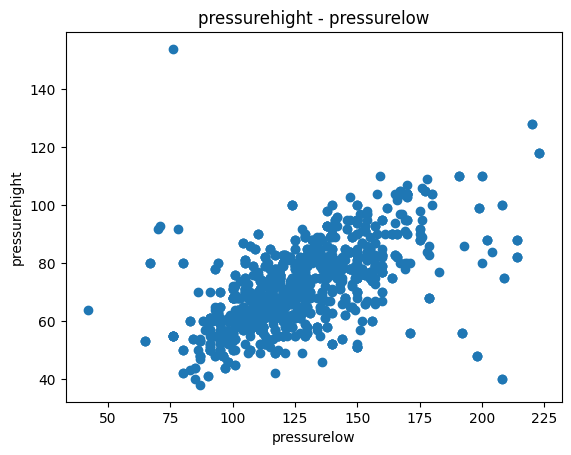

In [24]:
pressurehight = data[['pressurehight']]
pressurelow = data[['pressurelow']]
plt.scatter(pressurehight, pressurelow)
plt.ylabel('pressurehight')
plt.xlabel('pressurelow')
plt.title('pressurehight - pressurelow')

In [95]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# KNN
print('KNN ile başarı')
for i in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print('k = {0} için accuracy = {1}'.format(i, acc))

# RandomForestClassifier
print('\nRandomForestClassifier ile başarı')
for i in range(1,6):
  rfc = RandomForestClassifier(n_estimators=i, criterion='entropy')
  rfc.fit(x_train, y_train)
  y_pred = rfc.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print('RandomForestClassifier = {0} için acc = {1}'.format(i, acc))

KNN ile başarı
k = 1 için accuracy = 0.603030303030303
k = 2 için accuracy = 0.5696969696969697
k = 3 için accuracy = 0.6060606060606061
k = 4 için accuracy = 0.5757575757575758
k = 5 için accuracy = 0.6272727272727273
k = 6 için accuracy = 0.593939393939394
k = 7 için accuracy = 0.6242424242424243
k = 8 için accuracy = 0.6242424242424243
k = 9 için accuracy = 0.6515151515151515
k = 10 için accuracy = 0.6484848484848484

RandomForestClassifier ile başarı
RandomForestClassifier = 1 için acc = 0.9666666666666667
RandomForestClassifier = 2 için acc = 0.8696969696969697
RandomForestClassifier = 3 için acc = 0.9545454545454546
RandomForestClassifier = 4 için acc = 0.9787878787878788
RandomForestClassifier = 5 için acc = 0.9818181818181818
